## Australian rainfall prediction

Goal: **To predict the next-day rain based on other atmospheric features**
    
Dataset: This dataset comprises a decade of daily weather observations from multiple locations across Australia.

### Data Description:
    
**Location** - Name of the city from Australia.

**MinTemp/MaxTemp** - The minimum/maximum temperature during a particular day. (degree Celsius)

**Rainfall** - Rainfall during a particular day. (millimeters)

**Evaporation** - Evaporation during a particular day. (millimeters)

**Sunshine** - Bright sunshine during a particular day. (hours)

**WindGusDir** - The direction of the strongest gust during a particular day. (16 compass points)

**WindGuSpeed** - Speed of strongest gust during a particular day. (kilometers per hour)

**WindDir9am / WindDir3pm** - The direction of the wind for 10 min prior to 9 am. / 3pm. (compass points)

**WindSpeed9am / WindSpeed3pm** - Speed of the wind for 10 min prior to 9 am. / 3pm. (kilometers per hour)

**Humidity9am / Humidity3pm** - The humidity of the wind at 9 am. / 3pm. (percent)

**Pressure9am / Pressure3pm** - Atmospheric pressure at 9 am. / 3pm. (hectopascals)

**Cloud9am / Cloud3pm** - Cloud-obscured portions of the sky at 9 am. / 3pm.(eighths)

**Temp9am / Temp3pm** - The temperature at 9 am. / 3pm.(degree Celsius)

**RainToday** - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.

**RainTomorrow** - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

<div class="alert alert-block alert-success">The variables below were not presented in original dataset. However, I thought it would be wise to add regions and coordinates in order to plot the cities on the map (which I prepared in Tableau). Always better to see where the places  we are taking about are.

**State/Province** - State/Province of the locations in Australia

**Longitute/Latitude** - Coordinates of mentioned cities
</div>

It's a pity that there is no information about the date, however when we plot some variables I'm sure we will receive some seasonal trends in the data for example in min max temperature. 

Why do we measure "clouds", "wind direction","humidity","temperature" at 9am and 3pm? 

It is also important to become acquainted with Australian climate especially in respect of rainfall before we will immerse in the analysis of our dataset. Here are some key aspects:
    
1. Australia is located in the Southern Hemisphere and is surrounded by oceans (Southern Ocean,Pacific Ocean, Indian Ocean) and seas (Timor Sea,Arafura Sea,Coral Sea, Tasman Sea).
2. Dry and arid regions particularly in the central and western regions. These areas experience hot and dry conditions for much of the year, with limited rainfall. They are characterized by vast deserts, such as the Simpson Desert and the Great Victoria Desert.
3. Northern parts of Australia have tropical / subtropical climate - wet/dry seasons; monsoon seasons (wet) - from November to April,heavy rainfall,tropical cyclones; dry seasons - from May to October, lower humidity, clear skies
4. Southern / Southeastern regions have temparate climate - mild winters, moderate summers, rainfall throughout the year
5. Southern / Southwestern parts have mediterranean climate - mild, wet winters and hot,dry summers
6. Apline climate in southeastern regions (particularly the Australian Alps) - cold winters,snowfall,cool summers, higher rainfall due to orographic effects(rainfall caused by the lifting of moist air over mountains)
7. Coastale areas have mild temperatures and high humidity
8. Australia is prone to natural disasters, including tropical cyclones in the north and bushfires in various parts of the country.

To conclude: Australia's climate is highly diverse and can be broadly classified into several distinct regions based on precipitation patterns

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
raw_data=pd.read_csv("Weather Data.csv")
raw_data.head()

,row ID,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,New South Wales,-36.0737,146.9135,13.4,22.9,0.6,NaN,NaN,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,New South Wales,-36.0737,146.9135,7.4,25.1,0.0,NaN,NaN,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,New South Wales,-36.0737,146.9135,17.5,32.3,1.0,NaN,NaN,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,New South Wales,-36.0737,146.9135,14.6,29.7,0.2,NaN,NaN,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,New South Wales,-36.0737,146.9135,7.7,26.7,0.0,NaN,NaN,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
weather_data = raw_data.copy()
weather_data = weather_data.drop(['row ID'],axis=1)
weather_data.info()
# 25 columns, 99516 rows
#there are some nulls 
#types: object, float64,int64
#categorical variables: location, state/province, coordinates
#min,max temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        99516 non-null  object 
 1   State/Province  99516 non-null  object 
 2   Latitude        99516 non-null  float64
 3   Longitute       99516 non-null  float64
 4   MinTemp         99073 non-null  float64
 5   MaxTemp         99286 non-null  float64
 6   Rainfall        98537 non-null  float64
 7   Evaporation     56985 non-null  float64
 8   Sunshine        52199 non-null  float64
 9   WindGustDir     92995 non-null  object 
 10  WindGustSpeed   93036 non-null  float64
 11  WindDir9am      92510 non-null  object 
 12  WindDir3pm      96868 non-null  object 
 13  WindSpeed9am    98581 non-null  float64
 14  WindSpeed3pm    97681 non-null  float64
 15  Humidity9am     98283 non-null  float64
 16  Humidity3pm     97010 non-null  float64
 17  Pressure9am     89768 non-null 

In [4]:
weather_data.shape

(99516, 25)

In [5]:
pd.set_option('display.max_columns', None) #to see all the columns; None - meaning there will be no limit to the number of columns displayed
weather_data.describe(include="all")

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99516.000000,99516.000000,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,93036.000000,92510,96868,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,49,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Canberra,New South Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,2393,29037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,NaN,8052,7410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,-32.757384,142.072181,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,39.976966,NaN,NaN,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.013438,12.077971,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,13.581524,NaN,NaN,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-42.882100,115.100700,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,-36.073700,138.600700,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,-33.946200,145.834100,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,-31.498100,150.737800,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


In [6]:
#Missing values
NA_data = weather_data.isnull().sum()
NA_data

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             443
MaxTemp             230
Rainfall            979
Evaporation       42531
Sunshine          47317
WindGustDir        6521
WindGustSpeed      6480
WindDir9am         7006
WindDir3pm         2648
WindSpeed9am        935
WindSpeed3pm       1835
Humidity9am        1233
Humidity3pm        2506
Pressure9am        9748
Pressure3pm        9736
Cloud9am          37572
Cloud3pm          40002
Temp9am             614
Temp3pm            1904
RainToday           979
RainTomorrow          0
dtype: int64

In [7]:
NA_percentage = round(NA_data / weather_data.shape[0] *100,1)

In [8]:
print("Percentage of missing values in each column: \n{}".format(NA_percentage))

Percentage of missing values in each column: 
Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.4
MaxTemp            0.2
Rainfall           1.0
Evaporation       42.7
Sunshine          47.5
WindGustDir        6.6
WindGustSpeed      6.5
WindDir9am         7.0
WindDir3pm         2.7
WindSpeed9am       0.9
WindSpeed3pm       1.8
Humidity9am        1.2
Humidity3pm        2.5
Pressure9am        9.8
Pressure3pm        9.8
Cloud9am          37.8
Cloud3pm          40.2
Temp9am            0.6
Temp3pm            1.9
RainToday          1.0
RainTomorrow       0.0
dtype: float64


In [9]:
#Insights: 
#1. Are the missing values clustered in specific regions? 
#2. We can impute missing values using mean,median,mode -> this approach helps maintain the general distribution of the data
# Problem: it may introduce bias, we might observe some patterns etc. since the Na's are not missing at random
#3. We may use interpolation to estimate missing values
#4. Another option is to create binary indicators for example for cloud cover such as "cloudy","not cloudy"

# CATEGORICAL DATA

## Location - nominal
#### Name of the city from Australia

In [10]:
weather_data['Location'].value_counts()
#Why are there the most observations from Canberra,Sydney,Perth,Hobart..? Why this kind of hirarchy? How did they get this proportions?
#Well.. Firstly, these cities are the biggest, the most populous. Secondly, I noticed that the first listed cities are located in different regions on the map. 
#We distinguish 9 states/provinces, and the first 7 cities belongs to the 7 different regions. Circumstance? 

Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Watsonia            2113
Portland            2113
Bendigo             2110
Nuriootpa           2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga          2068
Dartmoor            2067
CoffsHarbour        2066
Witchcliffe         2060
Richmond            2060
Penrith             2059
GoldCoast           2057
Woomera             2053
Albany              2051
BadgerysCreek       2041
NorfolkIsland       2038
SalmonGums          2031
NorahHead           2028


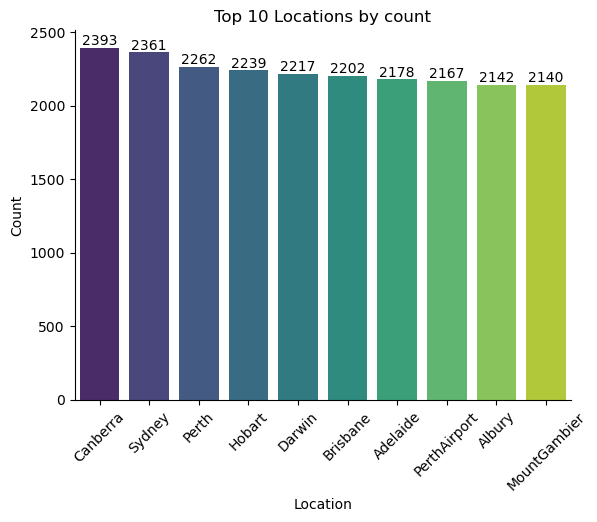

In [11]:
#type(weather_data['Location'].value_counts()) #pandas.core.series.Series
#weather_data['Location'].value_counts().index
#weather_data['Location'].value_counts().index[:10]
#weather_data['Location'].value_counts()[:10]

location_counts = weather_data['Location'].value_counts()
first_names = location_counts.index[:10]
first_counts = location_counts[:10]

sns.barplot(x=first_names, y=first_counts,palette='viridis')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations by count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

sns.despine()  # Remove the top and right spines

# Add annotations for each bar
for index, value in enumerate(first_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# e.g.if first_counts is [10, 25, 15, 30, 20], the enumerate() function will yield the following tuples: (0, 10), (1, 25), (2, 15), (3, 30), and (4, 20).
# index: The x-coordinate at which the text will be placed
# value: The y-coordinate at which the text will be placed
# str(value): The text that will be displayed at the specified coordinates
# ha - horizontal alignment
# va - vertical alignment
plt.show()

## State/Province - nominal
#### State or province of the cities in Australia

In [12]:
weather_data['State/Province'].value_counts()

 New South Wales                29037
 Victoria                       19712
 Western Australia              14513
 South Australia                 8481
 Queensland                      8466
Australian Capital Territory     6517
 Northern Territory              6441
 Tasmania                        4311
 Norfolk Island                  2038
Name: State/Province, dtype: int64

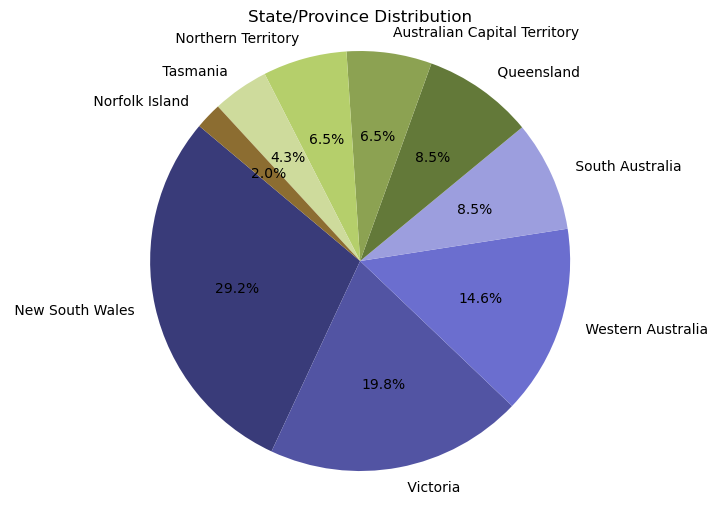

In [13]:
state_counts = weather_data['State/Province'].value_counts()

plt.figure(figsize=(8, 6))  #specifies the width and height of the figure in inches
sns.set_palette('tab20b')  

plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)

# autopct='%1.1f%%' - automatic percentage -> to display the percentage of each wedge(category)
# f - float, 1.1 - one digit after decimal point, %% - escape sequence to display % symbol
# By default, the first wedge starts from the positive x-axis (0 degrees) and proceeds counterclockwise - startangle

plt.title('State/Province Distribution')

plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## WindGustDir - nominal
#### The direction of the strongest gust during a particular day. (16 compass points)

In [14]:
pd.set_option('display.max_rows', None)
weather_data[weather_data['WindGustDir'].isnull()].head(100)
#In rows with missing WindGustDirection there are also NaN values in other variables
#NaN values in WindGustDir represent 6.6% of total number of rows, this is not so much, so that I decided to remove rows 
#with missing values in WindGustDir

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
43,Albury,New South Wales,-36.0737,146.9135,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,0
331,Albury,New South Wales,-36.0737,146.9135,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,No,0
769,Albury,New South Wales,-36.0737,146.9135,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,1
770,Albury,New South Wales,-36.0737,146.9135,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,1
771,Albury,New South Wales,-36.0737,146.9135,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,0
989,Albury,New South Wales,-36.0737,146.9135,5.6,28.7,0.0,NaN,NaN,NaN,NaN,ENE,WNW,7.0,28.0,70.0,22.0,1019.7,1013.3,NaN,NaN,16.2,28.3,No,0
990,Albury,New South Wales,-36.0737,146.9135,11.7,13.1,NaN,NaN,NaN,NaN,NaN,SSW,WSW,9.0,17.0,97.0,100.0,1016.8,1011.6,NaN,8.0,12.0,12.4,NaN,1
1436,Albury,New South Wales,-36.0737,146.9135,4.9,22.8,NaN,NaN,NaN,NaN,NaN,SE,ESE,4.0,9.0,80.0,38.0,1020.9,1017.1,NaN,NaN,10.7,21.9,NaN,0
2440,BadgerysCreek,New South Wales,-33.8775,150.7378,14.3,30.7,0.0,NaN,NaN,NaN,NaN,SW,NaN,7.0,NaN,83.0,NaN,1020.7,NaN,NaN,NaN,18.8,NaN,No,0
2443,BadgerysCreek,New South Wales,-33.8775,150.7378,19.1,24.3,0.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,91.0,NaN,1017.5,NaN,NaN,NaN,21.2,NaN,No,1


In [15]:
weather_data_cleaned_gust_dir = weather_data.dropna(subset=['WindGustDir'])
NA_data_cleaned_gust_dir = weather_data_cleaned_gust_dir.isnull().sum()
NA_data_cleaned_gust_dir

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             151
MaxTemp              39
Rainfall            858
Evaporation       39385
Sunshine          43824
WindGustDir           0
WindGustSpeed         0
WindDir9am         5265
WindDir3pm          668
WindSpeed9am        234
WindSpeed3pm        190
Humidity9am         969
Humidity3pm        1286
Pressure9am        7093
Pressure3pm        7069
Cloud9am          36533
Cloud3pm          37992
Temp9am             403
Temp3pm             731
RainToday           858
RainTomorrow          0
dtype: int64

In [16]:
#we removed the following number of missing observations:
NA_data - NA_data_cleaned_gust_dir

Location             0
State/Province       0
Latitude             0
Longitute            0
MinTemp            292
MaxTemp            191
Rainfall           121
Evaporation       3146
Sunshine          3493
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        1741
WindDir3pm        1980
WindSpeed9am       701
WindSpeed3pm      1645
Humidity9am        264
Humidity3pm       1220
Pressure9am       2655
Pressure3pm       2667
Cloud9am          1039
Cloud3pm          2010
Temp9am            211
Temp3pm           1173
RainToday          121
RainTomorrow         0
dtype: int64

In [17]:
weather_data_cleaned_gust_dir['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [18]:
custom_order = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
reversed_custom_order = custom_order[::-1]
wind_gust_dir = weather_data_cleaned_gust_dir['WindGustDir'].value_counts().reindex(reversed_custom_order)
wind_gust_dir

NNW    4589
NW     5599
WNW    5664
W      6843
WSW    6164
SW     6233
SSW    6023
S      6228
SSE    6329
SE     6475
ESE    5101
E      6341
ENE    5558
NE     4956
NNE    4569
N      6323
Name: WindGustDir, dtype: int64

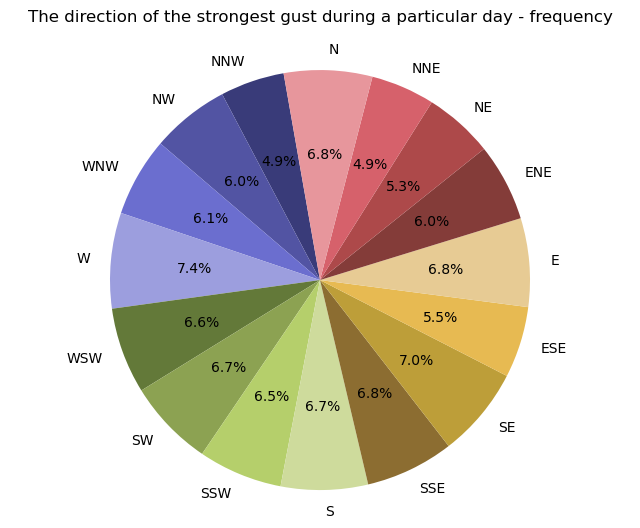

In [19]:
plt.figure(figsize=(8, 6))  #specifies the width and height of the figure in inches
sns.set_palette('tab20b')  

plt.pie(wind_gust_dir, labels=wind_gust_dir.index, autopct='%1.1f%%', startangle=100)

plt.title('The direction of the strongest gust during a particular day - frequency',pad=20) # pad=20 to make space between the title and the pie chart

plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## WindDir9am / WindDir3pm - nominal
#### The direction of the wind for 10 min prior to 9 am. / 3pm. (compass points)

In [20]:
# After removing NaN rows in WindGustDir, there is NaNs rows in: 
# WindDir9am         5265
# WindDir3pm          668
weather_data_cleaned_gust_dir.dropna(subset=['WindDir9am']).isnull().sum()
#I want to check if I remove missing values from WindDir9am, the missing values from WindDir3pm will disappear too. But only around 200 records contained NANs in both variables.  

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp              93
MaxTemp              34
Rainfall            663
Evaporation       36194
Sunshine          40221
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm          467
WindSpeed9am          0
WindSpeed3pm        141
Humidity9am         721
Humidity3pm        1172
Pressure9am        6437
Pressure3pm        6466
Cloud9am          33114
Cloud3pm          34546
Temp9am             241
Temp3pm             672
RainToday           663
RainTomorrow          0
dtype: int64

In [21]:
NA_percentage = round(NA_data_cleaned_gust_dir / weather_data_cleaned_gust_dir.shape[0] *100,1)
print("Percentage of missing values in each column: \n{}".format(NA_percentage))

Percentage of missing values in each column: 
Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.2
MaxTemp            0.0
Rainfall           0.9
Evaporation       42.4
Sunshine          47.1
WindGustDir        0.0
WindGustSpeed      0.0
WindDir9am         5.7
WindDir3pm         0.7
WindSpeed9am       0.3
WindSpeed3pm       0.2
Humidity9am        1.0
Humidity3pm        1.4
Pressure9am        7.6
Pressure3pm        7.6
Cloud9am          39.3
Cloud3pm          40.9
Temp9am            0.4
Temp3pm            0.8
RainToday          0.9
RainTomorrow       0.0
dtype: float64


In [22]:
#A convenient solution in this case may be to replace NaNs with the most frequent category (mode) since we have only few missing values
#type(weather_data_cleaned['WindDir9am'].mode()) pandas.core.series.Series
mode_winddir9am = weather_data_cleaned_gust_dir['WindDir9am'].mode().iloc[0]
mode_winddir3pm = weather_data_cleaned_gust_dir['WindDir3pm'].mode().iloc[0]
print(f"The mode in WindDri9am is: {mode_winddir9am}, while in WindDir3pm: {mode_winddir3pm}")

The mode in WindDri9am is: N, while in WindDir3pm: W


In [23]:
weather_data_with_mode_dir = weather_data_cleaned_gust_dir.copy()
weather_data_with_mode_dir['WindDir9am'] = weather_data_with_mode_dir['WindDir9am'].fillna(mode_winddir9am)
weather_data_with_mode_dir['WindDir3pm'] = weather_data_with_mode_dir['WindDir3pm'].fillna(mode_winddir3pm)

In [24]:
weather_data_with_mode_dir.isnull().sum()

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             151
MaxTemp              39
Rainfall            858
Evaporation       39385
Sunshine          43824
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am        234
WindSpeed3pm        190
Humidity9am         969
Humidity3pm        1286
Pressure9am        7093
Pressure3pm        7069
Cloud9am          36533
Cloud3pm          37992
Temp9am             403
Temp3pm             731
RainToday           858
RainTomorrow          0
dtype: int64

In [25]:
wind_dir_9am = weather_data_with_mode_dir['WindDir9am'].value_counts().reindex(custom_order)
wind_dir_3pm = weather_data_with_mode_dir['WindDir3pm'].value_counts().reindex(custom_order)

In [ ]:
#doubled_custom_order = [dir for dir in custom_order for _ in range(2)]

In [26]:
wind_dir = pd.DataFrame({'Direction': custom_order,'10 min prior to 9 am': wind_dir_9am.values, '10 min prior to 3 pm':wind_dir_3pm.values})
wind_dir

,Direction,10 min prior to 9 am,10 min prior to 3 pm
0,N,13009,5911
1,NNE,5432,4477
2,NE,4965,5402
3,ENE,5193,5257
4,E,6081,5451
5,ESE,5143,5504
6,SE,5876,6547
7,SSE,6068,6208
8,S,5753,6413
9,SSW,4948,5400


In [27]:
wind_dir.set_index('Direction', inplace=True)
wind_dir

,10 min prior to 9 am,10 min prior to 3 pm
Direction,,
N,13009,5911
NNE,5432,4477
NE,4965,5402
ENE,5193,5257
E,6081,5451
ESE,5143,5504
SE,5876,6547
SSE,6068,6208
S,5753,6413


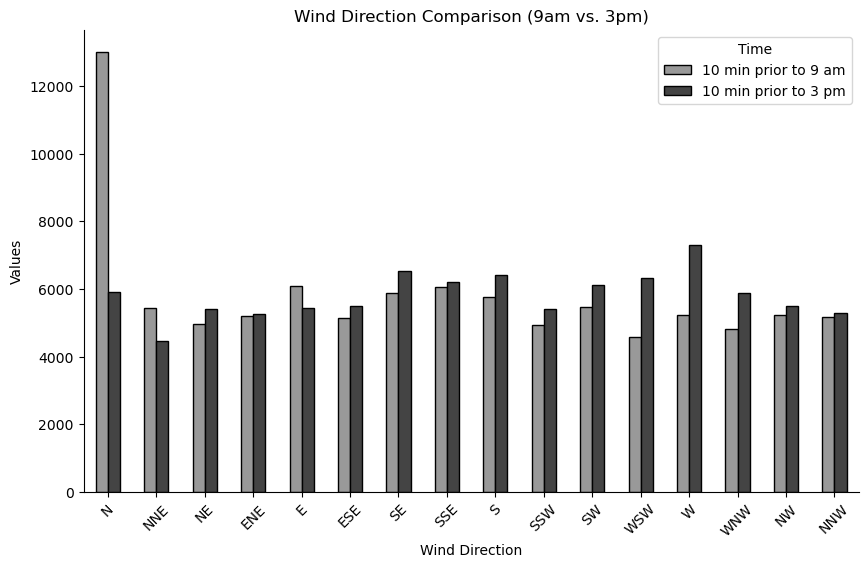

In [28]:
# Plot the grouped barplot
ax = wind_dir.plot(kind='bar', figsize=(10, 6), width=0.5,color=['#999', '#444'], edgecolor='black')
ax.set_ylabel('Values')
ax.set_xlabel('Wind Direction')
ax.set_title('Wind Direction Comparison (9am vs. 3pm)')
plt.legend(title='Time', fontsize=10)
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

## Cloud9am / Cloud3pm - ordinal
#### Cloud-obscured portions of the sky at 9 am. / 3pm.(scale in oktas - eighths)
In meteorology, cloud cover is often measured in "oktas." An okta is a unit of measurement used to estimate the fraction of the sky covered by clouds at any given time. It is divided into 8 equal parts, with each okta representing 1/8th of the sky covered by clouds.However, we can distinguish also 0 oktas and 9 oktas. 

Here's how cloud cover is typically described in terms of oktas:

0 oktas: Completely clear sky, no clouds.

1 okta: Very few clouds, almost clear sky.

2 oktas: Partly cloudy, 25% of the sky covered by clouds.

3 oktas: Mostly cloudy.

4 oktas: More clouds, about half of the sky covered.

5 oktas: Overcast sky.

6 oktas: Cloudy, with about 75% of the sky covered by clouds.

7 oktas: Mostly covered.

8 oktas: Completely overcast, the entire sky covered by clouds.

9 oktas: Sky obscured by thick clouds.


In [29]:
weather_data_with_mode_dir[['Cloud9am','Cloud3pm']].head(20)

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,7.0,8.0
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,8.0,8.0
8,NaN,7.0
9,0.0,NaN


In [30]:
sorted(weather_data_with_mode_dir['Cloud3pm'].unique())

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [31]:
sorted(weather_data_with_mode_dir['Cloud9am'].unique())

[8.0, nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]

In [32]:
weather_data_with_mode_dir[['Cloud9am','Cloud3pm']].isnull().sum() / weather_data_with_mode_dir.shape[0] * 100
# Around 40% observations are empty. We have to do someting with it. 
# 1. Is there any correlations between cloud variables and other ?
# 2. Compare 2 methods: filling with mode and with help of RandomForecastClassifier

Cloud9am    39.284908
Cloud3pm    40.853809
dtype: float64

In [33]:
weather_data_with_mode_dir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92995 entries, 0 to 99515
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        92995 non-null  object 
 1   State/Province  92995 non-null  object 
 2   Latitude        92995 non-null  float64
 3   Longitute       92995 non-null  float64
 4   MinTemp         92844 non-null  float64
 5   MaxTemp         92956 non-null  float64
 6   Rainfall        92137 non-null  float64
 7   Evaporation     53610 non-null  float64
 8   Sunshine        49171 non-null  float64
 9   WindGustDir     92995 non-null  object 
 10  WindGustSpeed   92995 non-null  float64
 11  WindDir9am      92995 non-null  object 
 12  WindDir3pm      92995 non-null  object 
 13  WindSpeed9am    92761 non-null  float64
 14  WindSpeed3pm    92805 non-null  float64
 15  Humidity9am     92026 non-null  float64
 16  Humidity3pm     91709 non-null  float64
 17  Pressure9am     85902 non-null 

In [34]:
weather_data_clouds = weather_data_with_mode_dir.copy()
#"Cloud9am","Cloud3pm" are categorical variables. I want to check their dependency with other categorical variables.

### The Chi-square test - categorical vs. categorical variable
The Chi-square test is used to determine if there is a significant association between two categorical variables. 
Process for conducting a Chi-square test:
1. Formulate the null and alternative hypotheses:
Null hypothesis: There is no association between the two categorical variables.
Alternative hypothesis: There is a significant association - || - 
2. Set the significance level (alpha): Choose a significance level (commonly 0.05) that represents the threshold for determining statistical significance. The significance level determines how strong the evidence against the null hypothesis must be before we reject it.
3. Create a contingency table (cross-tabulation)- a table that shows the observed frequencies for each combination of the two categorical variables.
4. Compute the Chi-square test statistic - you calculate the difference between the observed and expected frequencies and then you sum up them.
5. Find p-value
6. Comparison: If the p-value is < 0.05, reject the null hypothesis - there is a significant association between the variables. If The p-value >= 0.05 reject alternative hypothesis - there is no significant association.
7. Chi-square statistic: The bigger difference, the stronger association between the variables. When the test statistic is large, it suggests that there is a significant discrepancy between the observed and expected frequencies, indicating that the variables are dependent.

In [35]:
# Problem 1) Cloud's type is by default float, so I need to change it:
cloud_categories = {
    0: 'Clear',
    1: 'Few Clouds',
    2: 'Partly Cloudy',
    3: 'Mostly Cloudy',
    4: 'Cloudy',
    5: 'Overcast',
    6: 'Obscured',
    7: 'Mostly Obscured',
    8: 'Completely Overcast',
    9: 'Sky Obscured'
}

cloud_9am = weather_data_clouds['Cloud9am'].map(cloud_categories).astype('category')
cloud_3pm =  weather_data_clouds['Cloud3pm'].map(cloud_categories).astype('category')

#other categorical variables
location = weather_data_clouds['Location']
state = weather_data_clouds['State/Province']
wind_gust = weather_data_clouds['WindGustDir']
wind_9am = weather_data_clouds['WindDir9am']
wind_3pm = weather_data_clouds['WindDir3pm']
rain_today = weather_data_clouds['RainToday']

# 'RainTomorrow' - 0 if will be raining 1 if not 
rain_tomorrow = weather_data_clouds['RainTomorrow'].map({0:'No',1:'Yes'})

In [ ]:
# Create a crosstabulation between "cloud" and another categorical variable
#pd.crosstab(cloud_9am,cloud_3pm)
#pd.crosstab(cloud_9am,location)
#pd.crosstab(cloud_9am,state)
#pd.crosstab(cloud_9am,wind_gust)
#pd.crosstab(cloud_9am,wind_9am)
#pd.crosstab(cloud_9am,wind_3pm)
#pd.crosstab(cloud_9am,rain_today)
#pd.crosstab(cloud_9am,rain_tomorrow)

# If the sky is completely overcast (2) or mostly obscured (5) there is a high probability that will be raining

In [36]:
pd.crosstab(cloud_3pm,rain_today)

RainToday,No,Yes
Cloud3pm,,
Clear,3061,54
Cloudy,2569,793
Completely Overcast,4555,3346
Few Clouds,8708,814
Mostly Cloudy,3548,869
Mostly Obscured,8330,3625
Obscured,3995,1546
Overcast,3203,1092
Partly Cloudy,3888,734


In [37]:
# # Perform the chi-square test
location = weather_data_clouds['Location']
state = weather_data_clouds['State/Province']
wind_gust = weather_data_clouds['WindGustDir']
wind_9am = weather_data_clouds['WindDir9am']
wind_3am = weather_data_clouds['WindDir3pm']
rain_today = weather_data_clouds['RainToday']

categorical_tab = np.array([location,state,wind_gust,wind_9am,wind_3am,cloud_9am,cloud_3pm,rain_today,rain_tomorrow])
categorical_tab_str = np.array(['location','state','wind_gust','wind_9am','wind_3am','cloud_9am','cloud_3pm','rain_today','rain_tomorrow'])

In [38]:
def chi_square_test(categorical_var_1, categorical_var_2):
    crosstab = pd.crosstab(categorical_var_1, categorical_var_2)
    chi2, p, _, _ = chi2_contingency(crosstab)
    return chi2, p

In [39]:
chi_square_test(cloud_9am, cloud_3pm)

(36633.43857580545, 0.0)

In [40]:
def chi_square_contigency(tab_x, tab_x_str, var):
    df = pd.DataFrame(columns=['Variable', 'Chi-square', 'P-value'])
    for x, x_str in zip(tab_x, tab_x_str):
        chi2, p = chi_square_test(var, x)
        result = pd.DataFrame({'Variable': [x_str], 'Chi-square': [round(chi2,2)], 'P-value': [p]})
        df = pd.concat([df, result], ignore_index=True)
        df = df.sort_values('Chi-square',ascending=False)
    return df

In [41]:
chi_square_contigency(categorical_tab,categorical_tab_str,cloud_9am)

,Variable,Chi-square,P-value
0,cloud_9am,508158.00,0.000000e+00
1,cloud_3pm,36633.44,0.000000e+00
2,location,16163.77,0.000000e+00
8,rain_tomorrow,6196.06,0.000000e+00
3,rain_today,5586.28,0.000000e+00
4,state,4534.42,0.000000e+00
5,wind_9am,1923.65,0.000000e+00
6,wind_gust,1316.55,8.635775e-193
7,wind_3am,892.73,5.925084e-112


In [42]:
chi_square_contigency(categorical_tab,categorical_tab_str,cloud_3pm)

,Variable,Chi-square,P-value
0,cloud_3pm,495027.00,0.000000e+00
1,cloud_9am,36633.44,0.000000e+00
2,location,14306.65,0.000000e+00
8,rain_tomorrow,8707.26,0.000000e+00
3,state,4353.93,0.000000e+00
4,rain_today,4127.51,0.000000e+00
5,wind_9am,1765.20,9.360237e-282
6,wind_gust,1731.23,6.123276e-275
7,wind_3am,1219.77,5.636899e-174


**In summary**, the results show that all the variables (cloud_3pm, location, rain_tomorrow, rain_today, state, wind_9am, wind_gust, wind_3am) have a significant association with the variable "cloud_9am.". 
The same with "cloud_3pm", large chi-squares and small p-values (close to 0) indicate strong evidence against the null hypothesis and prove that there is a significant association between "cloud_3pm" and other variables.


# NUMERICAL DATA

## Min / Max temperature

In [ ]:
sorted(weather_data['Humidity9am'].unique())

In [ ]:
weather_data['Sunshine'].nunique()

In [ ]:
sorted(weather_data['Sunshine'].unique())

In [ ]:
sorted(weather_data['Cloud9am'].unique())

In [ ]:
weather_data['Rainfall'].nunique()

In [ ]:
weather_data['Cloud3pm'].unique()